In [ ]:
# Jhose Immanuel Sembiring
# 1103202047
# TK44G4
# dataset : Credit score classification   https://www.kaggle.com/datasets/parisrohan/credit-score-classification
# Dokumentasi ChatGPT : https://chat.openai.com/share/bbf396ed-eee1-4fa9-b61d-65e2439060ff

# Library

In [27]:
# Library
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import re



import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Menghubungkan ke GDrive

In [ ]:
# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Membaca dan Menampilkan Data_Train

In [ ]:


# Baca dataset dari Google Drive
path_to_file = "/content/drive/MyDrive/Semester8/Machine Learning/UTS/dataset/train.csv"
data_train = pd.read_csv(path_to_file)

# Tampilkan beberapa baris pertama dari dataframe_train
data_train.head()


<ipython-input-4-31a77319fdbb>:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv(path_to_file)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Data Preprocess

In [ ]:
# Menampilkan info data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
data_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
# Mengubang tipe data
data_train['Age'] = data_train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
data_train['Num_of_Loan'] = data_train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
data_train['Num_of_Delayed_Payment'] = data_train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)


In [ ]:
# Menampilkan info data
data_train.info()

In [19]:
# Mengubah tipe data
data_train['Annual_Income'] = data_train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
data_train['Annual_Income'] = data_train['Annual_Income'].astype(float)

In [23]:
# Mengganti karakter non-numerik dengan NaN, mengonversi kolom menjadi tipe data numerik, dan mengganti nilai yang hilang dengan nilai yang sesuai.
data_train['Changed_Credit_Limit'] = data_train['Changed_Credit_Limit'].replace('_', np.nan)
data_train['Changed_Credit_Limit'] = pd.to_numeric(data_train['Changed_Credit_Limit'], errors='coerce')
data_train['Changed_Credit_Limit'] = data_train['Changed_Credit_Limit'].fillna(0)

In [24]:
# Membersihkan kolom 'Outstanding_Debt' dari karakter non-angka, mengonversinya menjadi tipe data numerik, dan mengganti nilai yang hilang dengan nilai yang sesuai.
data_train['Outstanding_Debt'] = data_train['Outstanding_Debt'].astype(str)
data_train['Outstanding_Debt'] = data_train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
data_train['Outstanding_Debt'] = pd.to_numeric(data_train['Outstanding_Debt'], errors='coerce')
data_train['Outstanding_Debt'] = data_train['Outstanding_Debt'].fillna(0)

In [25]:
# Membersihkan kolom 'Amount_invested_monthly' dari karakter non-angka, mengonversinya menjadi tipe data numerik, dan mengganti nilai yang hilang dengan nilai yang sesuai
data_train['Amount_invested_monthly'] = data_train['Amount_invested_monthly'].astype(str)
data_train['Amount_invested_monthly'] = data_train['Amount_invested_monthly'].replace('', '0')
data_train['Amount_invested_monthly'] = data_train['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
data_train['Amount_invested_monthly'] = pd.to_numeric(data_train['Amount_invested_monthly'], errors='coerce')
data_train['Amount_invested_monthly'] = data_train['Amount_invested_monthly'].fillna(0)

In [26]:
# Membersihkan kolom 'Monthly_Balance' dari karakter non-angka, mengonversinya menjadi tipe data numerik, dan mengganti nilai yang hilang dengan nilai yang sesuai
data_train['Monthly_Balance'] = data_train['Monthly_Balance'].astype(str)
data_train['Monthly_Balance'] = data_train['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
data_train['Monthly_Balance'] = pd.to_numeric(data_train['Monthly_Balance'], errors='coerce')
data_train['Monthly_Balance'] = data_train['Monthly_Balance'].fillna(0)

In [28]:
# Mengonversi nilai dalam kolom 'Credit_History_Age' dari format "X Years and Y Months" menjadi total bulan.
def parse_years_and_months(age):
    if isinstance(age, str):
        match = re.match(r'(\d+) Years and (\d+) Months', age)
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            total_months = years * 12 + months
            return total_months
        else:
            return 0
    else:
        return 0

data_train['Credit_History_Age_Months'] = data_train['Credit_History_Age'].apply(parse_years_and_months)


In [31]:
# Menghapus nilai-nilai yang berada di atas persentil tertentu untuk setiap kolom yang dipilih
# Memilih kolom
selected_columns = data_train[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

# Tentukan persentil
percentile_threshold = 0.98
percentiles = selected_columns.quantile(percentile_threshold)

# Hapus perulangan nilai
for column in selected_columns.columns:
    data_train = data_train[data_train[column] <= percentiles[column]]

In [32]:
# Hapus baris-baris yang tidak diinginkan dari DataFrame train berdasarkan kriteria tertentu dalam kolom 'Payment_Behaviour' dan 'Occupation'.
# Menghapus Baris dengan Nilai Tertentu dalam Kolom 'Payment_Behaviour'
data_train = data_train[data_train['Payment_Behaviour'] != '!@9#%8']

# Menghapus Baris dengan Nilai Tertentu dalam Kolom 'Occupation'
data_train = data_train[data_train['Occupation'] != '_______']

# Mencetak Nilai Unik dalam Kolom 'Occupation'
print(data_train['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [35]:
# Buat dataframe baru
data_train = data_train[data_train['Credit_Mix'] != '_']

In [34]:
# Seleksi kolom untuk filtering
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

# Melakukan perulangan
for column in selected_columns:
    data_train = data_train[data_train[column] >= 0]

In [36]:
# Daftar drop
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

# Drop columns
data_train.drop(columns=columns_to_drop, inplace=True)

# Feature Engineering

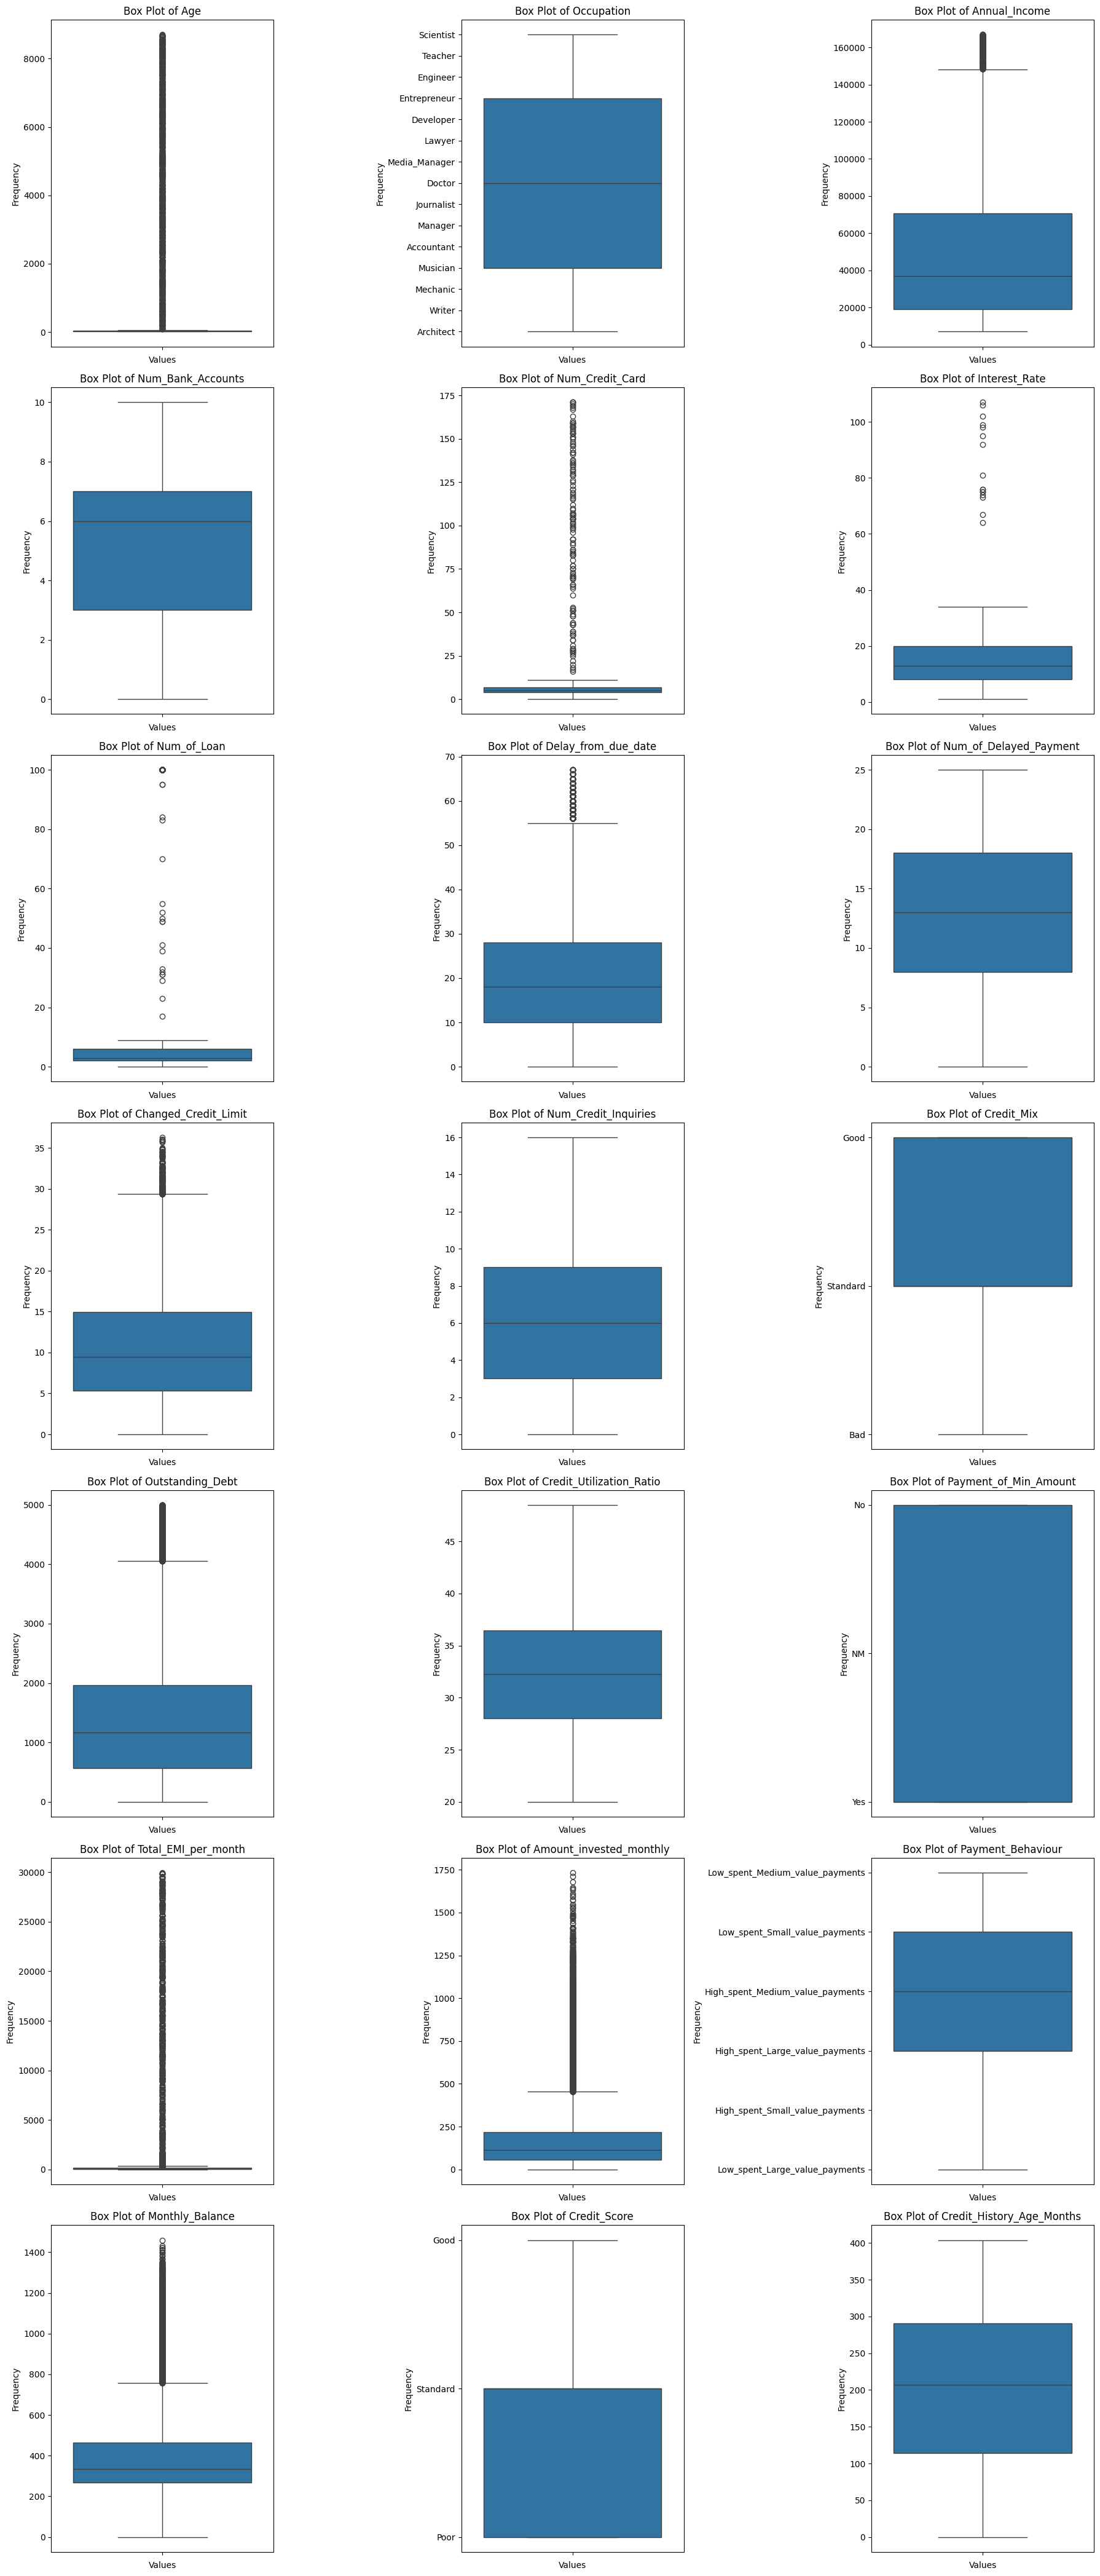

In [40]:


# Menentukan jumlah subplot berdasarkan jumlah fitur
num_features = len(data_train.columns)
num_cols = 3  # Jumlah kolom subplot
num_rows = (num_features + num_cols - 1) // num_cols  # Jumlah baris subplot

# Membuat subplot untuk setiap fitur
plt.figure(figsize=(18, 6*num_rows))
for i, column in enumerate(data_train.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=data_train[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Putar label x agar mudah dibaca
plt.tight_layout()
plt.show()


In [42]:
# Menghapus nilai-nilai yang dianggap sebagai nilai ekstrem
# Convert kolom 'Age' ke tipe data numerik jika belum
data_train['Age'] = pd.to_numeric(data_train['Age'], errors='coerce')

# Tune scale pada tiap kolom
data_train = data_train[data_train['Age'] < 60]
data_train = data_train[data_train['Num_Credit_Card'] <= 10]
data_train = data_train[data_train['Interest_Rate'] <= 50]
data_train = data_train[data_train['Num_of_Loan'] <= 12]
data_train = data_train[data_train['Num_Bank_Accounts'] <= 10]
data_train = data_train[data_train['Delay_from_due_date'] <= 60]
data_train = data_train[data_train['Changed_Credit_Limit'] <= 30]
data_train = data_train[data_train['Num_Credit_Inquiries'] <= 12]
data_train = data_train[data_train['Total_EMI_per_month'] <= 200]
data_train = data_train[data_train['Outstanding_Debt'] <= 1500]

In [43]:
# Mengubah tipe kategorikal menjadi bentuk numerik, yang dapat digunakan sebagai input untuk model

#Label Encoder
categories = ['Poor', 'Standard', 'Good']
encoder = OrdinalEncoder(categories=[categories])
data_train['Credit_Score_Encoded'] = encoder.fit_transform(data_train[['Credit_Score']])

# Encoding Occupation
label_encoder = LabelEncoder()
data_train['Occupation_Encoded'] = label_encoder.fit_transform(data_train['Occupation'])

#Ordinal Encoder
categories = ['Bad', 'Standard', 'Good']
encoder = OrdinalEncoder(categories=[categories])
data_train['Credit_Mix_Encoded'] = encoder.fit_transform(data_train[['Credit_Mix']])
categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]
encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])
data_train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(data_train[['Payment_Behaviour']])

#Dropping Unencoded Columns
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
data_train.drop(columns=columns_to_drop, inplace=True)

In [45]:
# Melakukan berbagai perhitungan tambahan berdasarkan kolom-kolom yang ada dalam DataFrame
# Total jumlah (Bank Accounts + Credit Cards)
data_train['Total_Num_Accounts'] = data_train['Num_Bank_Accounts'] + data_train['Num_Credit_Card']

# Total jumlah hutang per akun
data_train['Debt_Per_Account'] = data_train['Outstanding_Debt'] / data_train['Total_Num_Accounts']

# Perbandingan hutang dan pemasukan
data_train['Debt_to_Income_Ratio'] = data_train['Outstanding_Debt'] / data_train['Annual_Income']

# Total jumlah pembayaran yang telat per akun
data_train['Delayed_Payments_Per_Account'] = data_train['Num_of_Delayed_Payment'] / data_train['Total_Num_Accounts']

# Pengeluaran bulanan (EMI + Investasi bulanan)
data_train['Total_Monthly_Expenses'] = data_train['Total_EMI_per_month'] + data_train['Amount_invested_monthly']

In [48]:
# Menghitung skor Informasi Mutual (MI Score) antara setiap fitur dalam dataset X dan target y
# Identifikasi kolom-kolom kategorikal
categorical_columns = data_train.select_dtypes(include=['object']).columns

# Buat salinan untuk proses encoding
new_data_train = data_train.copy()

# Encoder Ordinal
encoder = OrdinalEncoder()

# Encoding pada kolom-kolom kategorikal
new_data_train[categorical_columns] = encoder.fit_transform(new_data_train[categorical_columns])

# Memisahkan target dan fitur
y = new_data_train['Credit_Score_Encoded']
X = new_data_train.drop(columns=['Credit_Score_Encoded'])

# Skor informasi mutual antara setiap fitur dalam X dan target y
mi_scores = mutual_info_classif(X, y)

# Skor informasi mutual untuk setiap fitur
for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.011590566733285401
Feature 'Annual_Income': Mutual Information Score = 0.42822933418687437
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.05796658627898865
Feature 'Num_Credit_Card': Mutual Information Score = 0.07479368650969276
Feature 'Interest_Rate': Mutual Information Score = 0.10198274399189655
Feature 'Num_of_Loan': Mutual Information Score = 0.018711916374483994
Feature 'Delay_from_due_date': Mutual Information Score = 0.06944645650719106
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.05144955617944835
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.10342007051131841
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.0337456920598731
Feature 'Outstanding_Debt': Mutual Information Score = 0.43077648857324347
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0008940600062685711
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.07158973126004531
Feature 'Total_E

In [47]:
# Urutkan skor informasi mutual dan nama fitur secara terbalik
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)

# Nama fitur
sorted_columns = [x[0] for x in sorted_mi_scores]

# Skor informasi mutual yang sudah diurutkan
sorted_scores = [x[1] for x in sorted_mi_scores]

# Skala warna
colorscale = 'Viridis'

# Buat plot
fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Skor Informasi Mutual', len=0.5, y=0.2)))])

# Tata letak plot
fig.update_layout(title='Skor Informasi Mutual untuk Setiap Fitur',
                  xaxis_title='Fitur',
                  yaxis_title='Skor Informasi Mutual')

# Menampilkan plot
fig.show()

# Model Machine Learning

In [49]:
# Siapkan dataframe untuk latih pada variabel y pada kolom Credit_Score_Encoded
y = data_train['Credit_Score_Encoded']

# Siapkan dataframe untuk latih pada variabel X pada kolom yang ditentukan dibawah
X = data_train[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Random Fores

In [50]:
# Melatih model Regresi Random Forest
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

# Evaluasi Model

In [51]:
# Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.170385667295898


In [52]:
# Acurasi Test
rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Accuracy on original test set: 0.793946260925866

Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       901
         1.0       0.81      0.87      0.84      3810
         2.0       0.76      0.68      0.72      1467

    accuracy                           0.79      6178
   macro avg       0.78      0.73      0.75      6178
weighted avg       0.79      0.79      0.79      6178



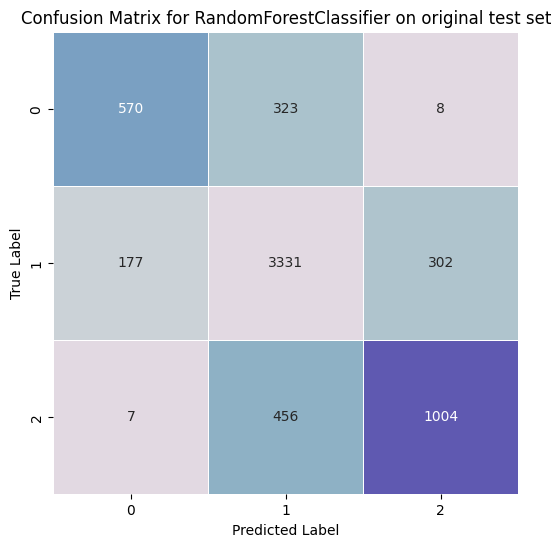

In [53]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))